In [1]:
import h5py

from matplotlib import pyplot as plt
import numpy as np

## Averaged dataset

In [2]:
train_file = '/work/ka1176/shared_data/2021-ai4food/dev_data/south-africa/planet-5/averaged/train_data.h5'

In [3]:
train_data = h5py.File(train_file, 'r')

In [4]:
train_data.keys()

<KeysViewHDF5 ['crop_name', 'fid', 'image_stack', 'label', 'mask']>

In [5]:
img = train_data['image_stack']
mask = train_data['mask']
img.shape, mask.shape

((4143, 48, 4, 1), (4143,))

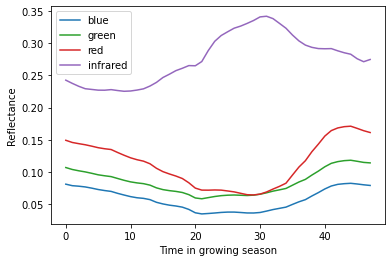

In [6]:
for i,lbl,c in zip(range(4), ['blue', 'green', 'red', 'infrared'], ['C0', 'C2', 'C3', 'C4']):
    plt.plot(np.mean(img, axis=0)[:, i].squeeze(), label=lbl, color=c) # channel averaged across all samples
    
plt.legend()
plt.xlabel('Time in growing season')
plt.ylabel('Reflectance')
plt.show()

## Extracted dataset

In [7]:
train_file = '/work/ka1176/shared_data/2021-ai4food/dev_data/germany/planet-5/extracted/train_data.h5'

In [8]:
train_data = h5py.File(train_file, 'r')

In [9]:
train_data.keys()

<KeysViewHDF5 ['crop_name', 'fid', 'image_stack', 'label', 'mask']>

In [10]:
img = train_data['image_stack']
mask = train_data['mask']
img.shape, mask.shape # dimension: samples, time, channels, randomly selected pixels

((2504, 73, 4, 64), (2504, 64))

In [11]:
ix = 70

print(img[ix][0][-1]) # all random pixels of sample 70, first time index, last channel (infrared)
print(mask[ix])

[0.1784 0.2484 0.2489 0.2103 0.2821 0.3026 0.2391 0.1956 0.2728 0.2569
 0.2733 0.2945 0.2428 0.2331 0.1453 0.2666 0.2609 0.3149 0.2495 0.2585
 0.2959 0.2707 0.2837 0.2336 0.3044 0.2673 0.2565 0.2691 0.2939 0.2792
 0.2652 0.3276 0.2875 0.3323 0.2437 0.2592 0.235  0.2456 0.2705 0.3015
 0.249  0.2963 0.2908 0.2625 0.2539 0.2655 0.1649 0.3266 0.2818 0.2808
 0.2821 0.2805 0.2608 0.2257 0.2585 0.2065 0.3087 0.2593 0.3175 0.2807
 0.3046 0.243  0.2652 0.2562]
[ 3700.  7903. 15897. 11518.  3103.  2910. 24805. 11006. 13359. 17350.
 12275. 15986.  8285. 14245.   193.  7559.  9857. 12944. 13550.  6201.
  9157. 12666. 12012.  8588. 23205. 13370. 11875. 10123.  7778.  3094.
 11806.  6180.  6566.  5400. 13749.  6399. 14515. 13973.  8736. 12554.
 13240. 15955. 10152.  8462. 13439. 17101.  4880. 23797.  9541.  7878.
  5393. 18346.  2526.  8785.  8492. 14835. 25380. 12475. 21665.  6349.
  3479.  8008. 10329.  2332.]


(array([ 1.,  2.,  1.,  2.,  4., 13., 17., 12.,  7.,  5.]),
 array([0.1453    , 0.164     , 0.18270001, 0.2014    , 0.2201    ,
        0.2388    , 0.2575    , 0.2762    , 0.2949    , 0.3136    ,
        0.3323    ], dtype=float32),
 <BarContainer object of 10 artists>)

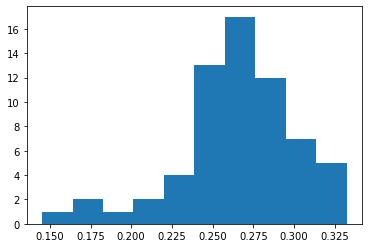

In [12]:
plt.hist(img[ix][0][-1])